<a href="https://colab.research.google.com/github/aayush9753/LearningResources/blob/master/Image_augmentation_using_Albumentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install albumentations

     |████████████████████████████████| 634kB 2.8MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=4890fe1c81b898b5a5f9d323b9fe2fdfcd7f01953f1623813d87b259603d044b
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading Something using the link

In [3]:
import requests  
file_url = "https://i.insider.com/5df126b679d7570ad2044f3e?width=1100&format=jpeg&auto=webp"
    
r = requests.get(file_url, stream = True)  
  
with open("/content/drive/My Drive/image.jpeg", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)  

# Defining a simple augmentation pipeline for image augmentation

### Import the required libraries

In [4]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

### Define the visualization function

In [5]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

### Read the image from the disk and convert it from the BGR color space to the RGB color space
 OpenCV reads an image in BGR format (so color channels of the image have the following order: Blue, Green, Red). Albumentations uses the most common and popular RGB image format. So when using OpenCV, we need to convert the image format to RGB explicitly.

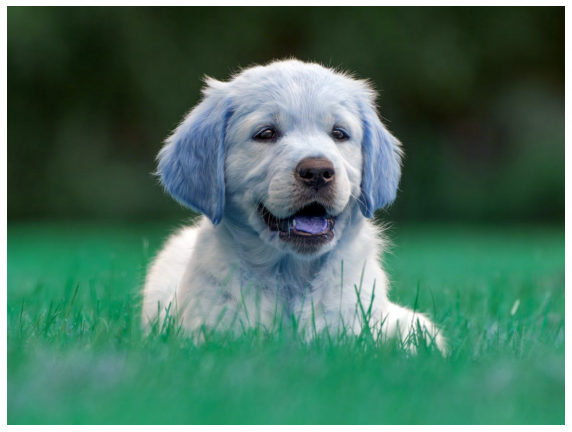

In [6]:
# if not converted to rgb format
image = cv2.imread('/content/drive/My Drive/image.jpeg') #using the direct image and converting it to array
#image = cv2.cvtColor(image) #, cv2.COLOR_BGR2RGB)
visualize(image)

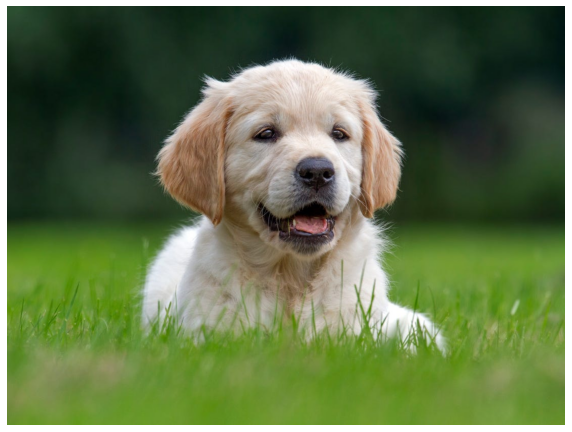

In [7]:
image = cv2.imread('/content/drive/My Drive/image.jpeg') #using the direct image and converting it to array
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
visualize(image)

### Define a single augmentation, pass the image to it and receive the augmented image
We fix the random seed for visualization purposes, so the augmentation will always produce the same result. In a real computer vision pipeline, you shouldn't fix the random seed before applying a transform to the image because, in that case, the pipeline will always output the same image. The purpose of image augmentation is to use different transformations each time.

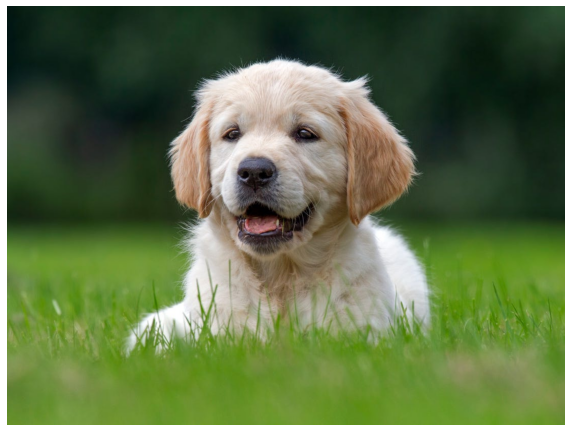

In [42]:
transform = A.HorizontalFlip(p=0.5)
#random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

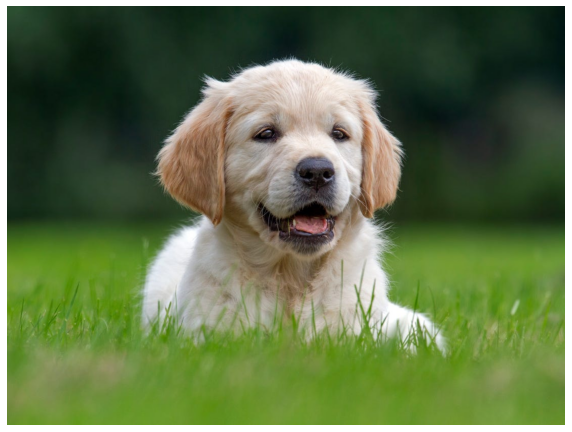

In [48]:
transform = A.ShiftScaleRotate(p=0.5)
#random.seed(7) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

### Define an augmentation pipeline using Compose, pass the image to it and receive the augmented image

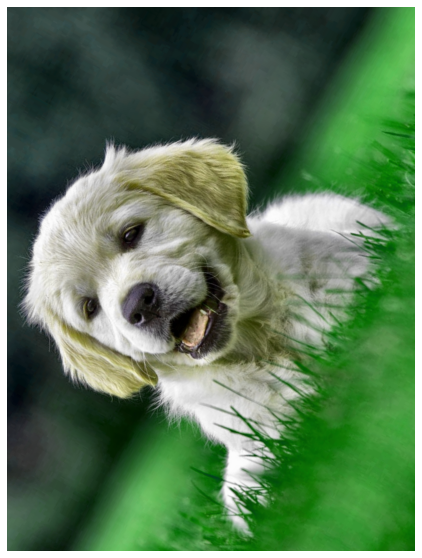

In [52]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
#random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

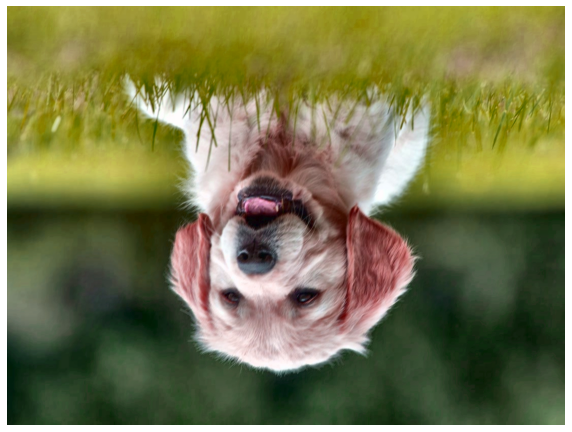

In [59]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
#random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

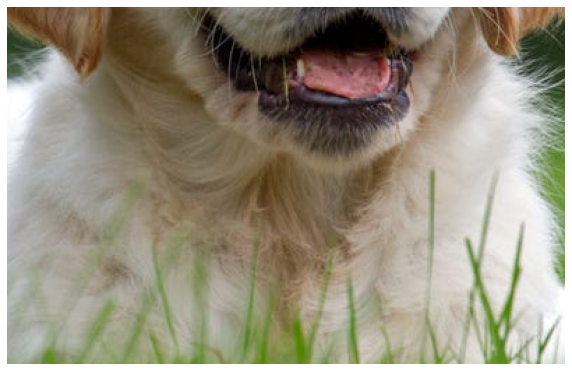

In [65]:
transform = A.Compose([
    A.RandomCrop(width=400, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])
#random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

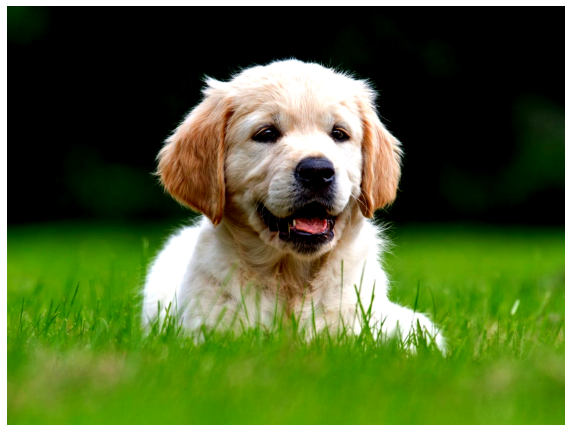

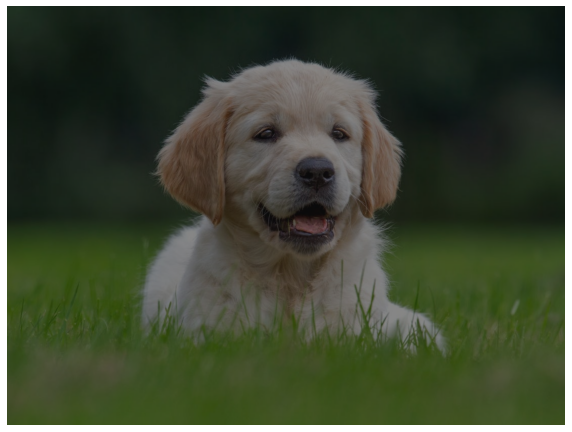

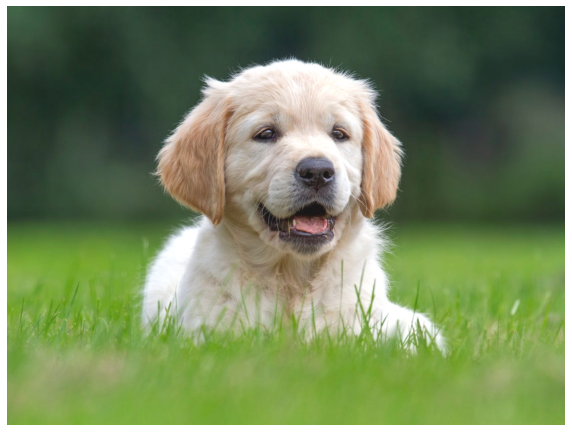

In [68]:
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0),
])
transformed_image_1 = transform(image=image)['image']
transformed_image_2 = transform(image=image)['image']
transformed_image_3 = transform(image=image)['image']
visualize(transformed_image_1)
visualize(transformed_image_2)
visualize(transformed_image_3)